# Sharvari  Chawade
# Dhruvi Shah
# Himanshu Kakwani

# Importing necessary libraries

In [ ]:
import zipfile
import os

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Extracting data

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

# Training Dataset

In [ ]:
train_File=[]
directory = '/tmp/archive/train'
for file in os.listdir(directory):
    if (file != '.DS_Store'):
      train_File+=[file]
      print(file)

dataset=[]
count=0
for file in tqdm(train_File):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])
    count=count+1

x_train = []
y_train = []
for i in range(len(dataset)):
  x_train.append(dataset[i][0])

for j in range(len(dataset)):
  y_train.append(dataset[j][1])
print(len(x_train),len(y_train))

xtrain = np.array(x_train)
ytrain = np.array(y_train)
ytrain = keras.utils.to_categorical(ytrain,2)

print(xtrain.shape,ytrain.shape)

Positive
Negative


100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

600 600
(600, 100, 100, 3) (600, 2)


# Test Dataset

In [ ]:
test_File=[]
directory = '/tmp/archive/test'
for file in os.listdir(directory):
    if (file != '.DS_Store'):
      test_File+=[file]
      print(file)

testset=[]

count=0
for file in tqdm(test_File):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset.append([image,count])
    count=count+1

print(len(testset))
x_test = []
y_test = []
for i in range(len(testset)):
  x_test.append(testset[i][0])

for j in range(len(testset)):
  y_test.append(testset[j][1])
print(len(x_test),len(y_test))

xtest = np.array(x_test)
yhattest = np.array(y_test)
ytest = keras.utils.to_categorical(yhattest,2)

print(xtest.shape,ytest.shape)

Positive
Negative


100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

200
200 200
(200, 100, 100, 3) (200, 2)


# Validation Dataset

In [ ]:
val_File=[]
directory = '/tmp/archive/valid'
for file in os.listdir(directory):
    if (file != '.DS_Store'):
      val_File+=[file]
      print(file)

valset=[]

count=0
for file in tqdm(val_File):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        valset.append([image,count])
    count=count+1

print(len(valset))
x_val = []
y_val = []
for i in range(len(valset)):
  x_val.append(valset[i][0])

for j in range(len(valset)):
  y_val.append(valset[j][1])
print(len(x_val),len(y_val))

xval = np.array(x_val)
yval = np.array(y_val)
yval = keras.utils.to_categorical(yval,2)

print(xval.shape,yval.shape)

Positive
Negative


100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

200
200 200
(200, 100, 100, 3) (200, 2)


# Prediction Dataset

In [ ]:
path = '/tmp/archive/predict'

predset=[]

for im in os.listdir(path):
  image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
  image=img_to_array(image)
  image=image/255.0
  predset.append(image)

preddata = np.array(predset)
preddata.shape

(7, 100, 100, 3)

# Nature of dataset

In [ ]:
print(len(dataset),len(testset),len(valset),len(predset))

600 200 200 7


[1. 0.]


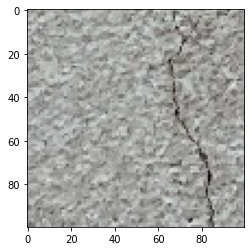

In [ ]:
print(ytrain[100])
plt.imshow(xtrain[100])

# Model building
We have built a transfer learning based model that uses ResNet50. In the output layer we have made changes by using 2 classes and softmax as the activation function. We have also used dropout just before the output layer to avoid overfitting.

In [ ]:
pretrained_model3 = tf.keras.applications.ResNet50(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs2 = tf.keras.layers.Dropout(0.5)(x3)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(outputs2)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
his=model.fit(xtrain,ytrain,batch_size=32,validation_data=(xval,yval),epochs=1000)

Epoch 1/1000
19/19 [==============================] - 5s 99ms/step - loss: 0.8528 - accuracy: 0.5183 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 2/1000
19/19 [==============================] - 1s 44ms/step - loss: 0.7141 - accuracy: 0.5083 - val_loss: 0.6764 - val_accuracy: 0.5000
Epoch 3/1000
19/19 [==============================] - 1s 50ms/step - loss: 0.6747 - accuracy: 0.5783 - val_loss: 0.6827 - val_accuracy: 0.5000
Epoch 4/1000
19/19 [==============================] - 1s 44ms/step - loss: 0.6597 - accuracy: 0.5933 - val_loss: 0.6588 - val_accuracy: 0.7650
Epoch 5/1000
19/19 [==============================] - 1s 50ms/step - loss: 0.6627 - accuracy: 0.5933 - val_loss: 0.6612 - val_accuracy: 0.5950
Epoch 6/1000
19/19 [==============================] - 1s 50ms/step - loss: 0.6647 - accuracy: 0.5917 - val_loss: 0.6786 - val_accuracy: 0.5200
Epoch 7/1000
19/19 [==============================] - 1s 44ms/step - loss: 0.6490 - accuracy: 0.6267 - val_loss: 0.6444 - val_accuracy: 0.7050

# Results on Test Dataset

In [ ]:
results = model.evaluate(xtest, ytest, verbose=0)
loss = results[0]
acc = results[1]
    
print("    Test Loss: {:.5f}".format(loss))
print("Test Accuracy: {:.2f}%".format(acc * 100))
    


    Test Loss: 0.29313
Test Accuracy: 92.00%


In [ ]:
test_pred = model.predict(xtest)
y_pred = np.argmax(test_pred,axis = 1)

7/7 [==============================] - 1s 27ms/step


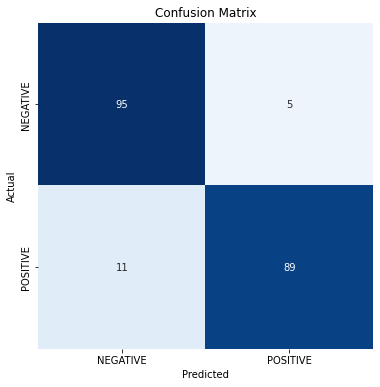

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.90      0.95      0.92       100
    POSITIVE       0.95      0.89      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [ ]:
cm = confusion_matrix(yhattest, y_pred)
clr = classification_report(yhattest, y_pred, target_names=["NEGATIVE", "POSITIVE"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
    
print("Classification Report:\n----------------------\n", clr)

# Predictions
Using the built model, we have made predictions on the prediction dataset of 6 images

In [ ]:
y_pred=model.predict(preddata)
pred=np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 348ms/step


1


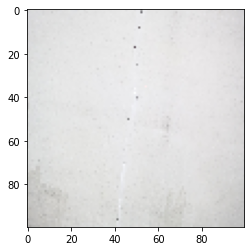

In [ ]:
print(pred[1])
plt.imshow(preddata[1])

1


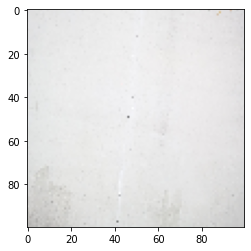

In [ ]:
print(pred[2])
plt.imshow(preddata[2])

1


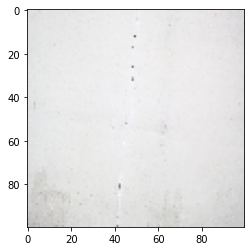

In [ ]:
print(pred[3])
plt.imshow(preddata[3])

1


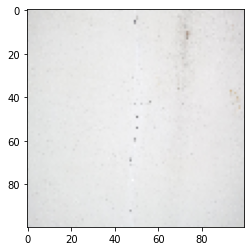

In [ ]:
print(pred[4])
plt.imshow(preddata[4])

1


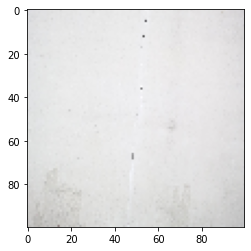

In [ ]:
print(pred[5])
plt.imshow(preddata[5])

1


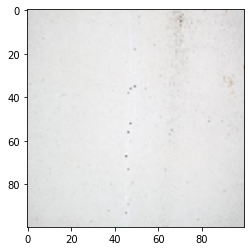

In [ ]:
print(pred[6])
plt.imshow(preddata[6])